##Machine learning algorithm - decision trees.
* Develop a classification model using a decision tree algorithm.based on historical data of patients and their response to various medications.
Use this classification algorithm to build a model
*  Use a trained decision tree to predict the class of an unknown patient or find the appropriate drug for a new patient.
* Collected data from a group of patients, all of whom suffered from the same disease. During the course of treatment, each patient responded to one of 5 drugs: drug A, drug B, drug c, drug x and y.
* Build a model to figure out which drug might be suitable for a future patient with the same disease.

The features of the dataset are the age, gender, blood pressure and cholesterol level of the patients, and the target is the drug to which each patient responded.

A decision tree needs to be built and then used to predict the class of an unknown patient or to prescribe a drug to a new patient.

##Import the required libraries

In [1]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [31]:
url = "https://gitlab.com/codedeploycloud/data_science/-/raw/main/datasets/ml/drug_decision_trees.csv"

In [32]:
df_drug_test = pd.read_csv(url)

##EDA
explore with methods head, tail, info, describe,shape.
Displayed the first and last rows, summary info, statistics, and shape of the dataset. The dataset contains information about patients' responses to different drugs, with features like age, gender, blood pressure, cholesterol. It has 200 rows and 6 columns.

In [4]:
df_drug_test.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Na_to_K'].plot(kind='hist', bins=20, title='Na_to_K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('BP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Drug').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Na_to_K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Na_to_K'].plot(kind='line', figsize=(8, 4), title='Na_to_K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BP'].value_counts()
    for x_label, grp in _df_8.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('BP')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Drug'].value_counts()
    for x_label, grp in _df_9.groupby('BP')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BP')
_ = plt.ylabel('Drug')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Age', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['BP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Age', y='BP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Drug'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Age', y='Drug', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Na_to_K', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
df_drug_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df_drug_test.tail()

Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

In [6]:
df_drug_test.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Na_to_K'].plot(kind='hist', bins=20, title='Na_to_K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Age', y='Na_to_K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Na_to_K'].plot(kind='line', figsize=(8, 4), title='Na_to_K')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df_drug_test.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [8]:
df_drug_test.describe(include=['O'])


Sex    BP Cholesterol   Drug
count   200   200         200    200
unique    2     3           2      5
top       M  HIGH        HIGH  drugY
freq    104    77         103     91

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('BP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('Cholesterol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Drug').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BP'].value_counts()
    for x_label, grp in _df_23.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('BP')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cholesterol'].value_counts()
    for x_label, grp in _df_24.groupby('BP')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BP')
_ = plt.ylabel('Cholesterol')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Drug'].value_counts()
    for x_label, grp in _df_25.groupby('Cholesterol')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cholesterol')
_ = plt.ylabel('Drug')

In [9]:
df_drug_test.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df_drug_test.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df_drug_test.shape

(200, 6)

###Cramer's V
For categorical variables, Cramer's V can be used to assess the strength of association between them. This coefficient is suitable for contingency tables and measures the degree of relationship between two categorical variables.
Для категориальных переменных можно использовать коэффициент V Крамера для оценки степени ассоциации между ними. Этот коэффициент подходит для таблиц сопряженности и измеряет степень взаимосвязи между двумя категориальными переменными.



In [10]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_drug_test['Cholesterol'], df_drug_test['Drug'])

def cramers_v(table):
    chi2, p, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_v_value = cramers_v(contingency_table)
print(f"Cramer's V Value: {cramers_v_value}")

Cramer's V Value: 0.2798954475877339



Cramer's V is a measure of association between two categorical variables. It ranges from 0 to 1, with higher values indicating stronger associations. In this case, a value of 0.28 suggests a moderate association between the variables being analyzed. The closer the value is to 1, the stronger the association.

### Visualization
Visualization techniques such as clustered bar charts can be employed to illustrate the relationships between these variables, providing insights into the strength and patterns of associations among them.

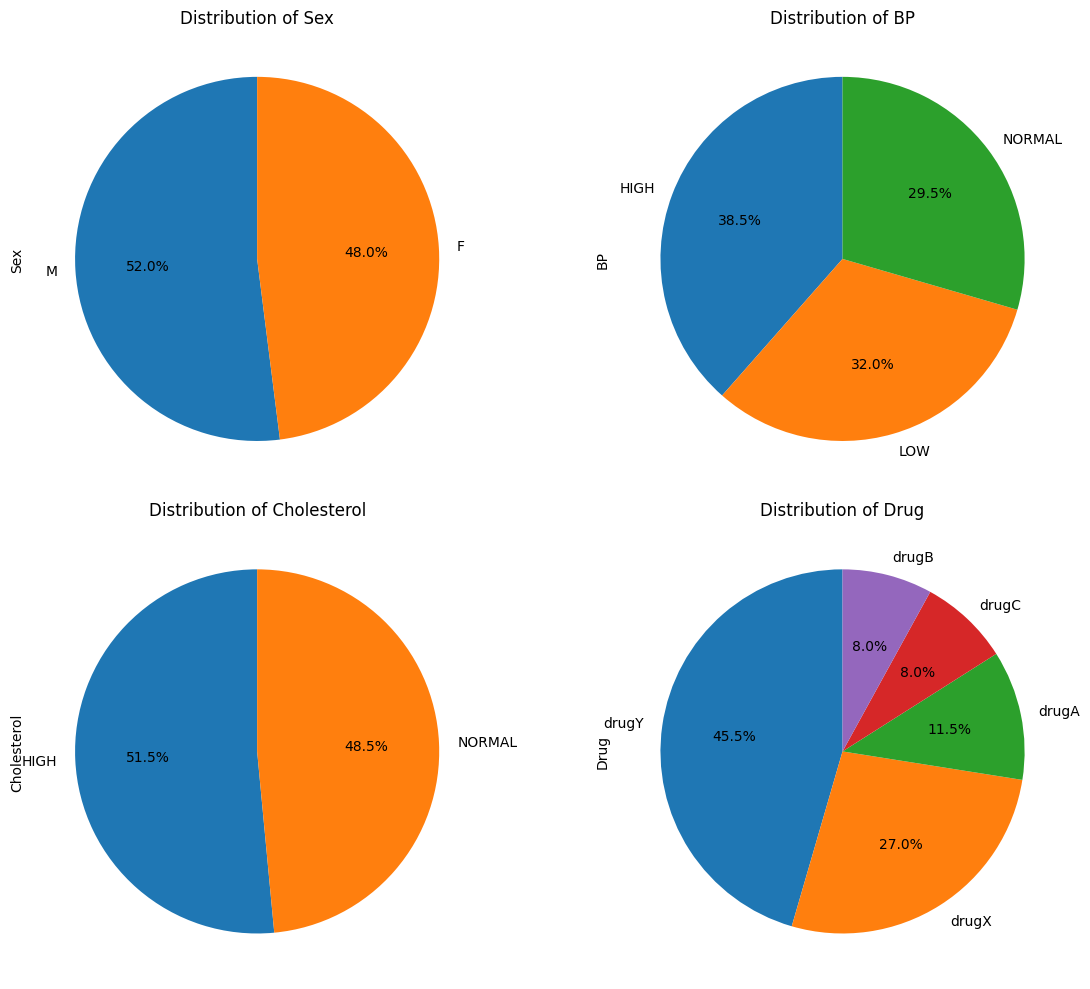

In [11]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, col in enumerate(['Sex', 'BP', 'Cholesterol', 'Drug']):
    ax = axes[i // 2, i % 2]
    df_drug_test[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
print(df_drug_test['Sex'].unique())

['F' 'M']


In [ ]:
df_drug_test.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df_drug_test.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

#

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.7.1
0.12.2


<ipython-input-12-9b60a7ea7613>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


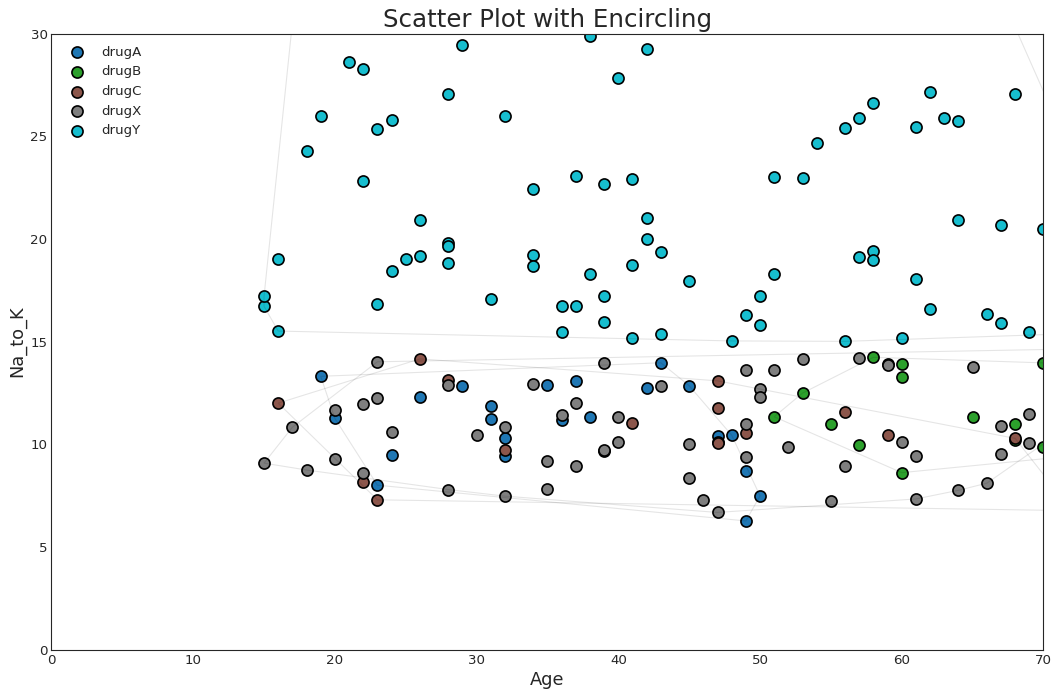

In [37]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')

drug_counts = df_drug_test['Drug'].value_counts()
annotations = [f"{drug}: {count}" for drug, count in drug_counts.items()]


categories = np.unique(df_drug_test['Drug'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]


fig, ax = plt.subplots(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    data_category = df_drug_test.loc[df_drug_test['Drug'] == category, :]
    ax.scatter('Age', 'Na_to_K', data=data_category, s=100, c=[colors[i]], label=str(category), edgecolors='black', linewidths=1.5)


def encircle(x, y, ax=None, ec=None, fc=None, alpha=0.1):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], edgecolor=ec, facecolor=fc, alpha=alpha)
    ax.add_patch(poly)


for category in categories:
    data_category = df_drug_test.loc[df_drug_test['Drug'] == category, :]
    encircle(data_category['Age'], data_category['Na_to_K'], ax=ax, ec="k", fc="none")#, linewidths=1.5)

plt.gca().set(xlim=(0, 70), ylim=(0, 30), xlabel='Age', ylabel='Na_to_K')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatter Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()


###Count sex depend of age and drug
creates a horizontal bar chart using Seaborn's countplot to visualize the distribution of drug prescriptions based on gender (Sex). The unique drugs are ordered in a specific way, and a color palette is applied for clarity. The plot provides a clear comparison of drug distributions across genders.








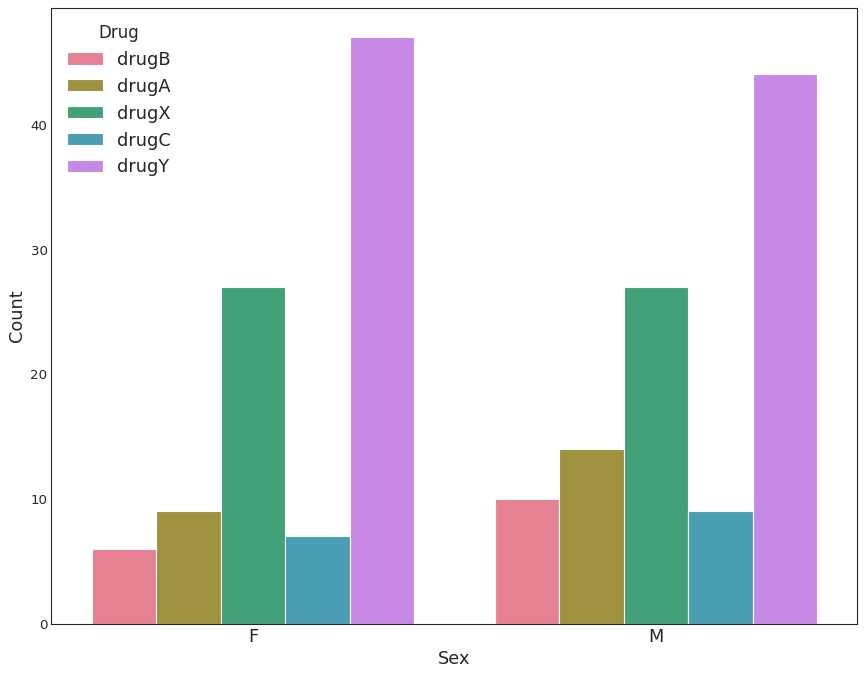

In [14]:
plt.figure(figsize=(13, 10), dpi=80)

group_col = 'Sex'
order_of_bars = df_drug_test['Drug'].unique()[::-1]

palette = sns.color_palette("husl", 5)

sns.countplot(x='Sex', hue='Drug', data=df_drug_test, order=df_drug_test['Sex'].unique(), hue_order=order_of_bars, palette=palette)

plt.ylabel("Count")
plt.yticks(fontsize=12)
plt.legend(title='Drug', title_fontsize='15')
plt.show()


###relationship between age, gender,bp and medications
This Seaborn catplot generates a grouped violin plot, visualizing the relationship between age (Age), drug prescription (Drug), gender (Sex), and blood pressure (BP). Each subplot represents a unique combination of gender and blood pressure, with violins depicting the distribution of age for each drug category.

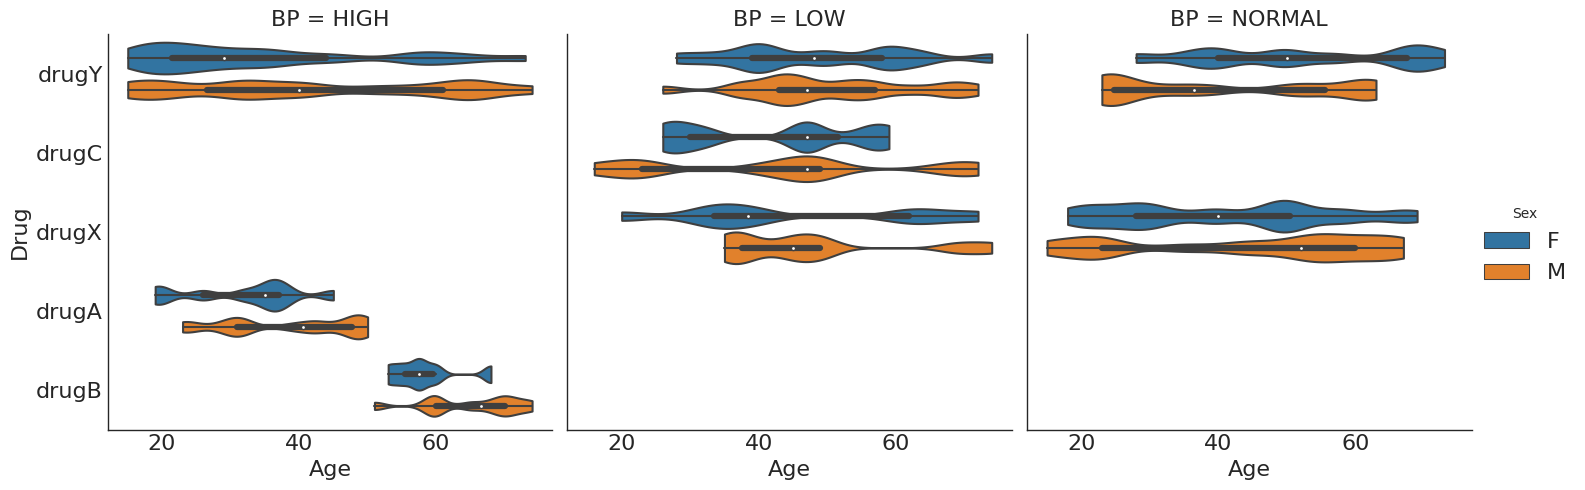

In [36]:

sns.catplot(x="Age", y="Drug",
            hue="Sex", col="BP",
            data=df_drug_test[df_drug_test.Drug.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

###relationship between age,cholesterol and medications

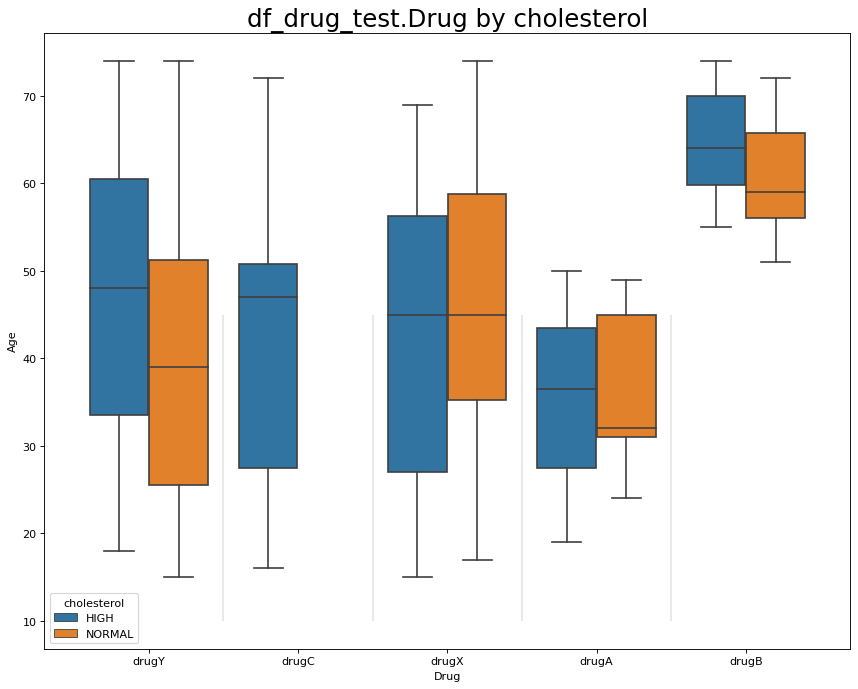

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Drug', y='Age', data=df_drug_test, hue='Cholesterol')


for i in range(len(df_drug_test['Drug'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

plt.title('df_drug_test.Drug by cholesterol', fontsize=22)
plt.legend(title='cholesterol')
plt.show()

###convert "sex" into a binary format
This process converts the categorical variable 'Sex' into a binary format, where 'F' is represented as 1 and 'M' as 0, enabling machine learning models to effectively interpret and utilize gender information.

In [38]:
#F': 1, 'M': 0
df_drug_test['Sex'] = df_drug_test['Sex'].map({'F': 1, 'M': 0})
df_drug_test.head()

Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    1    HIGH        HIGH   25.355  drugY
1   47    0     LOW        HIGH   13.093  drugC
2   47    0     LOW        HIGH   10.114  drugC
3   28    1  NORMAL        HIGH    7.798  drugX
4   61    1     LOW        HIGH   18.043  drugY

######convert "cholesterol" into a binary format

In [39]:
#'HIGH': 1, "NORMAL": 0
df_drug_test['Cholesterol'] = df_drug_test['Cholesterol'].map({'HIGH': 1, "NORMAL": 0})
df_drug_test.head()

Age  Sex      BP  Cholesterol  Na_to_K   Drug
0   23    1    HIGH            1   25.355  drugY
1   47    0     LOW            1   13.093  drugC
2   47    0     LOW            1   10.114  drugC
3   28    1  NORMAL            1    7.798  drugX
4   61    1     LOW            1   18.043  drugY

###one-hot encodes the 'BP', "Drug"
This code one-hot encodes the 'BP' (blood pressure) and " Drug" columns in the df_drug_test, creating binary columns prefixed with 'BP', "drug". The original 'BP' and "Drug" columns is then dropped, leaving the DataFrame with additional binary columns representing different blood pressure categories  and drugs  categories for each observation.

In [40]:
df_drug_test = pd.concat([df_drug_test, pd.get_dummies(df_drug_test['BP'], prefix='BP')], axis=1)

df_drug_test = df_drug_test.drop('BP', axis=1)


In [41]:
df_drug_test = pd.concat([df_drug_test, pd.get_dummies(df_drug_test['Drug'], prefix='Drug')], axis=1)

df_drug_test = df_drug_test.drop('Drug', axis=1)

In [42]:
df_drug_test.head(10)

Age  Sex  Cholesterol  Na_to_K  BP_HIGH  BP_LOW  BP_NORMAL  Drug_drugA  \
0   23    1            1   25.355        1       0          0           0   
1   47    0            1   13.093        0       1          0           0   
2   47    0            1   10.114        0       1          0           0   
3   28    1            1    7.798        0       0          1           0   
4   61    1            1   18.043        0       1          0           0   
5   22    1            1    8.607        0       0          1           0   
6   49    1            1   16.275        0       0          1           0   
7   41    0            1   11.037        0       1          0           0   
8   60    0            1   15.171        0       0          1           0   
9   43    0            0   19.368        0       1          0           0   

   Drug_drugB  Drug_drugC  Drug_drugX  Drug_drugY  
0           0           0           0           1  
1           0           1           0           0  
2           0           1           0           0  
3           0           0           1           0  
4           0           0           0           1  
5           0           0           1           0  
6           0           0           0           1  
7           0           1           0           0  
8           0           0           0           1  
9           0           0           0           1

###Correlation between variables
The code computes and visualizes a correlation matrix for the df_drug_test. The heatmap illustrates the pairwise correlations between numerical variables, annotated with correlation coefficients. The color intensity indicates the strength and direction of correlations.

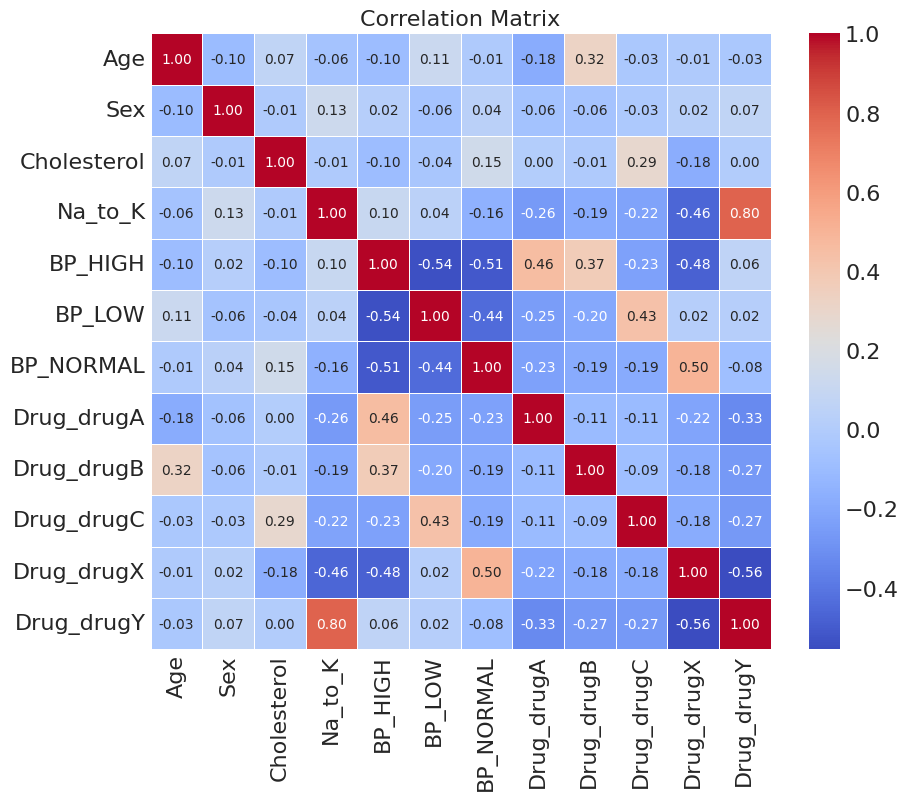

In [21]:

correlation_matrix = df_drug_test.corr()

# Создать тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


####conclusion de correlations

* Drug Y and Na_to_K (Correlation: 0.80):
('Na_to_K') increases, it suggests a higher likelihood for the prescription of 'Drug Y.'
This means, for a person with a higher Na_to_K ratio, there's a stronger recommendation for 'Drug Y' to aid in their recovery from the illness.
*  Drug_B, Age, and BP_low (Correlation: 0.32 and 0.37):For 'Drug_B,' there is a slight positive relationship with age and low blood pressure ('BP_low').If the person is older, there's a slightly increased chance of being prescribed 'Drug_B,' especially if they have lower blood pressure
* Drug_A and BP_high (Correlation: 0.46):The correlation suggests that as the person's high blood pressure ('BP_high') increases, the likelihood of being prescribed 'Drug_A' moderately rises.
In simpler terms, if a person has higher-than-normal blood pressure, the recommendation might be 'Drug_A' to aid in their recovery.
*  Drug_X and BP_normal (Correlation: 0.50):
The correlation indicates a moderate positive relationship between 'Drug_X' and normal blood pressure ('BP_normal').
If a person has a normal blood pressure level, there's a moderately increased likelihood of being prescribed 'Drug_X' for their recovery.





###Modeling:

   First, create an instance of DecisionTreeClassifier called DrugTree.
   Inside the classifier, specify criterion="entropy" criterion="entropy" so that we can see the information gain for each node.
   Adapt the data to the training function matrix X_trainset and the training response vector y_trainset.

In [43]:
X = df_drug_test[['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL']]
y = df_drug_test[['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY']]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [ ]:
print("Форма X_trainset:", X_trainset.shape)
print("Форма y_trainset:", y_trainset.shape)

print("Форма X_testset:", X_testset.shape)
print("Форма y_testset:", y_testset.shape)

In [44]:
DrugTree = DecisionTreeClassifier(criterion="entropy")
DrugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [45]:
predTree = DrugTree.predict(X_testset)
print("Предсказанные значения:\n", predTree)
print("\nФактические значения:\n", y_testset.values)

accuracy = metrics.accuracy_score(y_testset, predTree)
print("\nТочность модели:", accuracy)



Предсказанные значения:
 [[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]

Фактические значения:
 [[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 

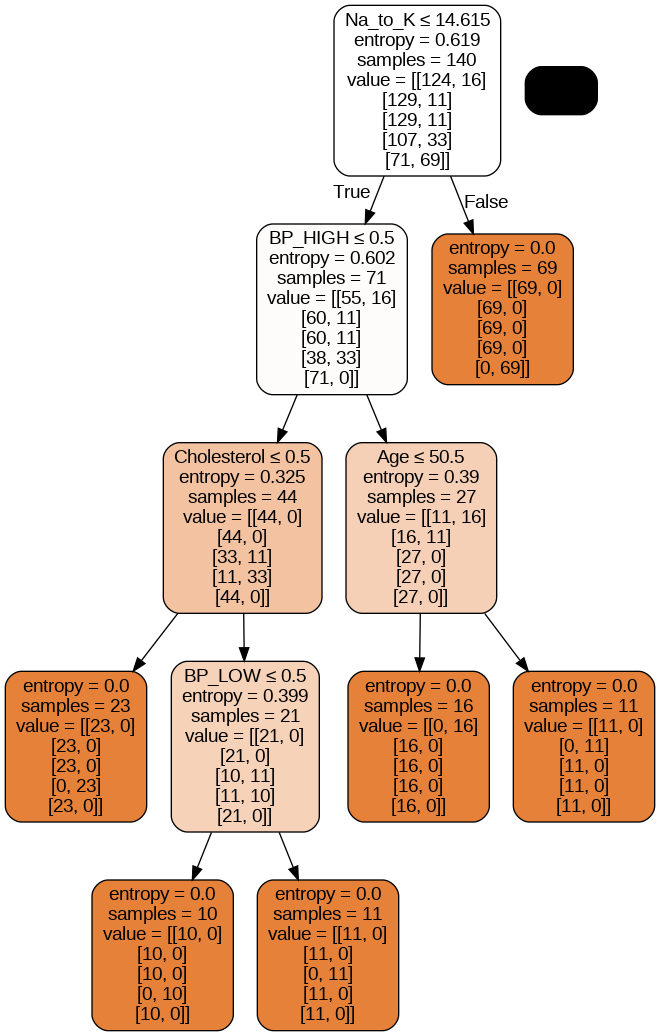

In [47]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(DrugTree, out_file=None,
                           feature_names=X.columns,
                           class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

##conclusion about decision tree
The information about the decision tree node reveals a condition related to low blood pressure (BP_low). The number associated with it (0.5) is a threshold used for splitting the data. Here's what these numbers mean:

BP_low (0.5): This is likely a crucial factor in deciding the right treatment. If a patient's low blood pressure is below this threshold, it influences the decision.

Entropy (0.399): Think of entropy as the level of uncertainty or disorder in the data. A lower value (closer to 0.399 in this case) indicates clearer distinctions in the dataset.

Samples (21): This is the number of cases falling into this category. In this scenario, there are 21 cases that meet the criteria.

Value ([21.0]): All 21 cases in this node belong to a 'drugY'. This provides an insight into the prevalent prescription for patients meeting this condition.

To determine the suitable drug for a patient with a similar condition, you'd follow the decision tree, considering each condition from the root to the leaves. In this case, the focus is on low blood pressure (BP_low). Understanding the conditions and distributions at each node helps guide the decision-making process for choosing the right medication for a patient's recovery.






